In [1]:
#Import the module and other libraries
import line_detection_updated as ld
import image_rotation as ir
import satmetrics

from astropy.io import fits
import astropy.visualization as aviz

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline

import numpy as np

from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2

In [2]:
#Set filepaths
current_user_filepath = 'Data'
img1 = current_user_filepath + '/calexp-0941420_07.fits'
img2 = current_user_filepath + '/calexp-0941422_33.fits'
img3 = current_user_filepath + '/calexp-0941424_34.fits'
img4 = current_user_filepath + '/calexp-0941426_16.fits'
img5 = current_user_filepath + '/calexp-0941424_37.fits'
img6 = current_user_filepath + '/STARLINK-1892-20220305200929.fits'
img7 = current_user_filepath + '/STARLINK-1892-N-20220305200959.fits'
img8 = current_user_filepath + '/STARLINK-1905-20220305191929.fits'
img_multiple_streaks = current_user_filepath + '/bi327715.fits'





In [3]:
#What is the working image?

current_image_filepath = img6
image_dict = satmetrics.file_ingest(current_image_filepath)
working_image = image_dict['image_list'][0] #Each fits file can have multiple science images. 


08/14/2022 09:16:08 PM Number of detected lines = 28


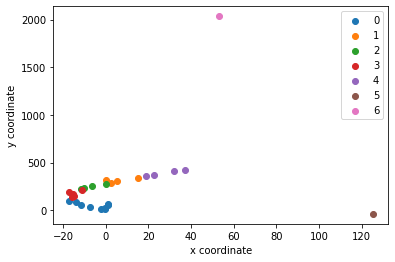

In [4]:
#Get the Hough transformation results
detector = ld.LineDetection(image=working_image.data)
results_ht = detector.hough_transformation()
clustered_lines = ld.cluster(results_ht["Cartesian Coordinates"], results_ht["Lines"], plot_image=True)
nclusters = int(np.max(clustered_lines[:,-1]) + 1)

In [5]:
clustered_lines

array([[ 1.31000000e+02, -2.96705973e-01,  5.00000000e+00],
       [-1.39000000e+02, -1.45734993e+00,  3.00000000e+00],
       [ 2.03600000e+03,  1.54461639e+00,  6.00000000e+00],
       [-1.76000000e+02, -1.48352986e+00,  3.00000000e+00],
       [-1.54000000e+02, -1.47480322e+00,  3.00000000e+00],
       [-2.32000000e+02, -1.52716310e+00,  2.00000000e+00],
       [-2.21000000e+02, -1.51843645e+00,  2.00000000e+00],
       [-1.95000000e+02, -1.48352986e+00,  3.00000000e+00],
       [-2.10000000e+02, -1.51843645e+00,  3.00000000e+00],
       [-2.51000000e+02, -1.54461639e+00,  2.00000000e+00],
       [-5.90000000e+01, -1.37008346e+00,  0.00000000e+00],
       [-2.75000000e+02, -1.57079633e+00,  2.00000000e+00],
       [ 6.70000000e+01,  1.55334303e+00,  0.00000000e+00],
       [-8.30000000e+01, -1.40499005e+00,  0.00000000e+00],
       [-1.50000000e+01, -1.55334303e+00,  0.00000000e+00],
       [-9.50000000e+01, -1.38753676e+00,  0.00000000e+00],
       [ 3.62000000e+02,  1.51843645e+00

In [27]:
clustered_lines[2,-1] = 5
clustered_lines[3,-1] = 6


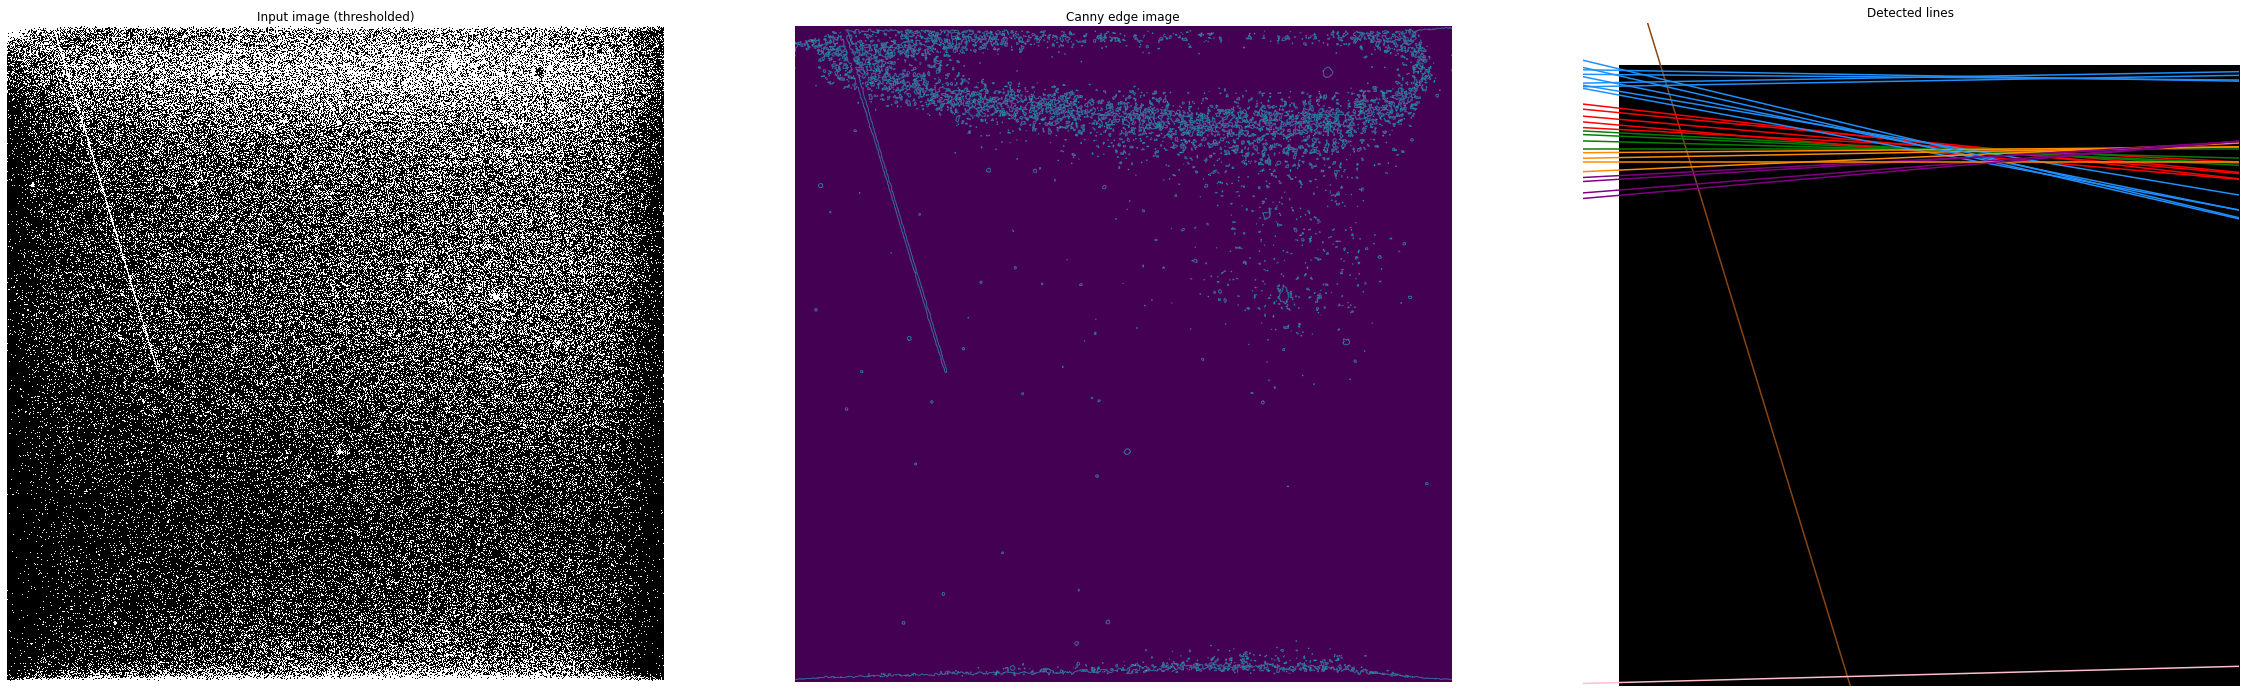

In [10]:
#Plots of line detection
from random import randint
color = ['dodgerblue', 'darkorange', 'green', 'red', 'purple', 'saddlebrown', 'pink', 'gray', 'yellow', 'deepskyblue']
#n = nclusters
#for i in range(n):
#    color.append('#%06X' % randint(0, 0xFFFFFF))

fig, axes = plt.subplots(1, 3, figsize=(40, 40))
ax = axes.ravel()

ld.show(results_ht['Thresholded Image'], cmap="gray", ax=ax[0], interpolation="none")
ax[0].set_title('Input image (thresholded)')
ax[0].set_axis_off()

ld.show(results_ht["Edges"], ax=ax[1])
ax[1].set_title('Canny edge image')
ax[1].set_axis_off()

#Detected lines
blank_image = np.zeros(detector.image.shape)

ld.show(blank_image, cmap="gray", ax=ax[2])

ax[2].set_axis_off()
ax[2].set_title('Detected lines')

cart_coords = results_ht['Cartesian Coordinates']
angles = results_ht['Angles']
for i in range(len(cart_coords)):
    ax[2].axline(cart_coords[i], slope=np.tan(angles[i] + np.pi/2), c=color[int(clustered_lines[i,-1])])


In [68]:
from random import randint
color = []
n = nclusters
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))


color[1]


'#8A72FD'

<AxesSubplot:>

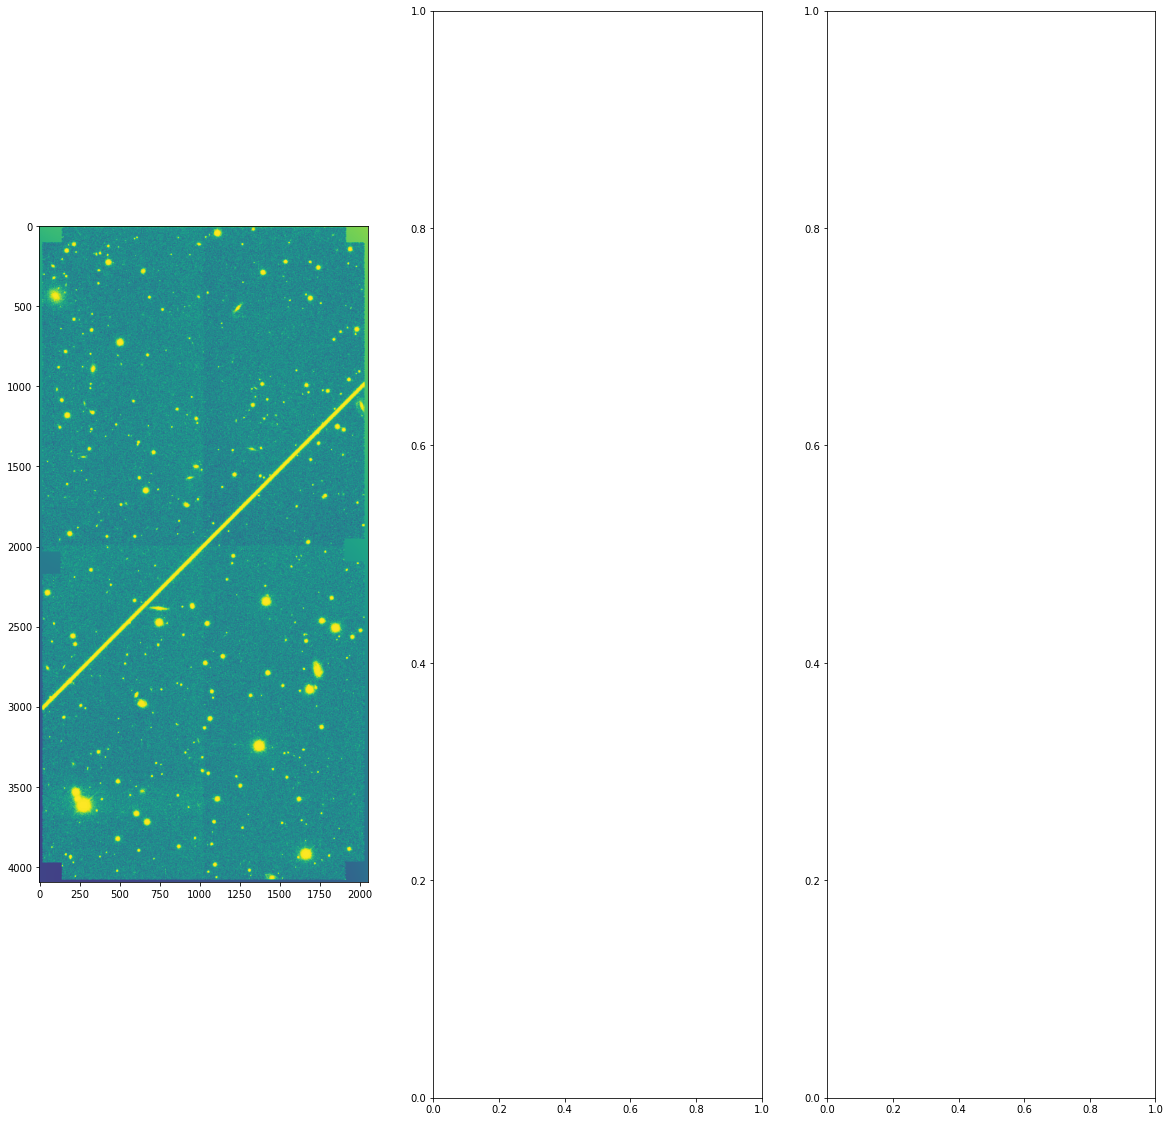

In [10]:
#Visualize raw image
#Visualize raw image
import astropy.visualization as aviz

stretch = aviz.HistEqStretch(detector.image)
norm = aviz.ImageNormalize(detector.image, stretch=stretch, clip=True)
histeq = norm(detector.image)

fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ld.show(histeq, ax=axes[0])

<AxesSubplot:>

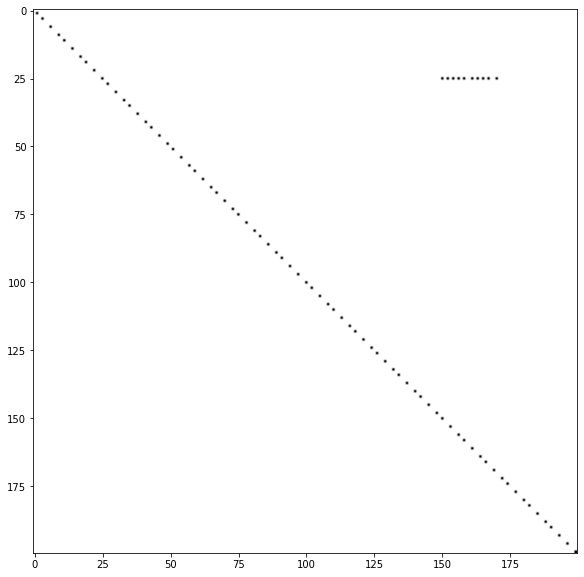

In [19]:
#Plot to demonstrate the voting method of Hough Transform
import numpy as np
test_img = np.zeros((200,200))

for i in np.linspace(1,199,75,dtype='int'):
    test_img[i,i] = 255

for i in np.linspace(150,170,10, dtype='int'):
    test_img[25,i] = 255

#Introduce noise
#x = list(np.random.randint(0, high=199, size=(700,), dtype=int))
#y = list(np.random.randint(0, high=199, size=(700,), dtype=int))

#for x, y in zip(x,y):
 #   test_img[x,y] = 255

fig, axes = plt.subplots(figsize=(10, 10))
ld.show(test_img, ax=axes, cmap='Greys')


In [34]:
#Analyze results
import pandas as pd
filepath = 'results_dummy_data.csv'
results = pd.read_csv(filepath)

results

,Month,actual brightness,reported brightness
0,Jan,48.77,46
1,Feb,49.85,48
2,March,48.03,49
3,April,47.00,47
4,May,46.00,47
5,June,49.00,50


08/11/2022 08:04:41 PM Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
08/11/2022 08:04:41 PM Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
08/11/2022 08:04:41 PM Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
08/11/2022 08:04:41 PM Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


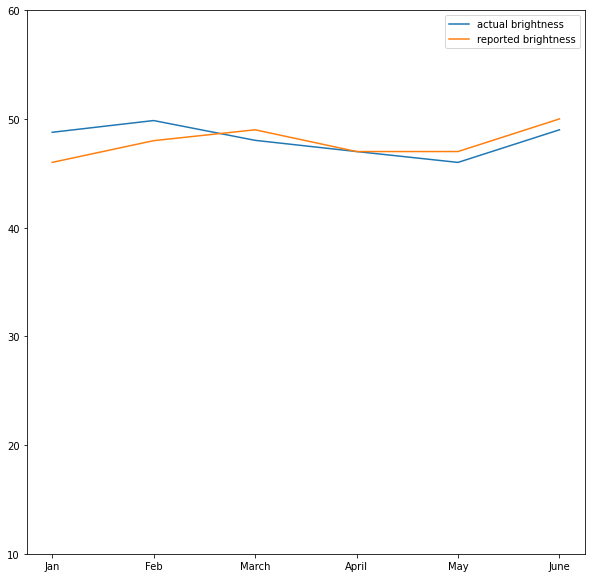

In [42]:
plt.figure(figsize=(10,10))

plt.plot(results['Month'],results['actual brightness'], label="actual brightness")
plt.plot(results['Month'],results['reported brightness'], label="reported brightness")
plt.ylim([10, 60])
plt.legend()
plt.show()
